In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert the labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Initialize the model
model = Sequential()

# Flatten the input images to a 1D vector (3072 = 32 * 32 * 3)
model.add(Flatten(input_shape=(32, 32, 3)))

# Add fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons (one for each class) and softmax activation for classification
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.2721 - loss: 2.0135 - val_accuracy: 0.3946 - val_loss: 1.7046
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.3933 - loss: 1.6943 - val_accuracy: 0.4341 - val_loss: 1.6108
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.4297 - loss: 1.5933 - val_accuracy: 0.4356 - val_loss: 1.6049
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.4474 - loss: 1.5365 - val_accuracy: 0.4674 - val_loss: 1.5094
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.4698 - loss: 1.4824 - val_accuracy: 0.4774 - val_loss: 1.4697
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.4820 - loss: 1.4512 - val_accuracy: 0.4709 - val_loss: 1.4863
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.4915 - loss: 1.4199 - val_accuracy: 0.4614 - val_loss: 1.5321
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.5051 - loss: 1.3848 - 

In [5]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5086 - loss: 1.4313
Test Loss: 1.4489784240722656
Test Accuracy: 0.5063999891281128


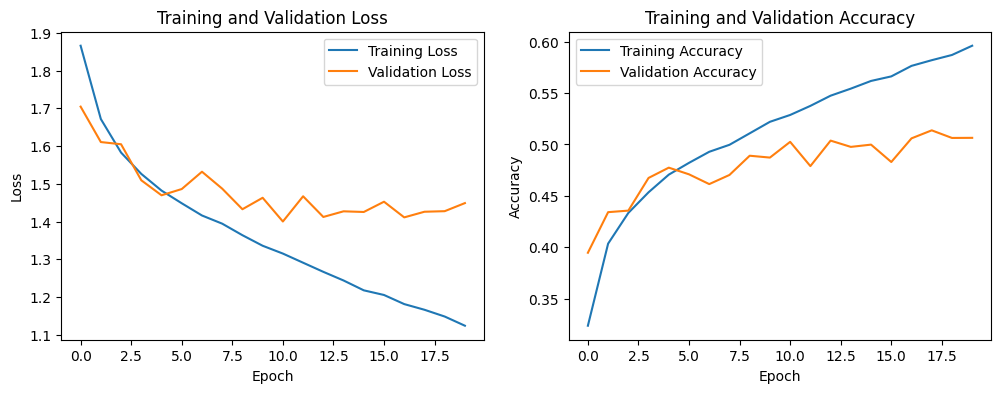

In [6]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()
